In [1]:
import pandas as pd
import numpy as np


In [2]:
df_train=pd.read_csv('train_houseprice.csv')
df_test=pd.read_csv('test_houseprice.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# filling na values


<AxesSubplot:>

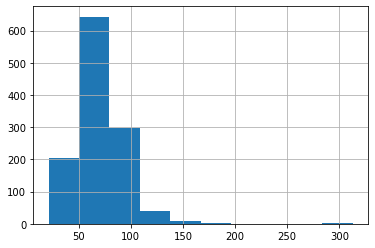

In [6]:
df_train['LotFrontage'].hist()

In [7]:
#LotFrontage -Linear feet of street connected to property=>mode=>outliers present
df_train['LotFrontage'].fillna(value=df_train['LotFrontage'].mode()[0],inplace=True)

In [8]:
df_test['LotFrontage'].isna().sum()

227

In [9]:
df_test['LotFrontage'].fillna(value=df_train['LotFrontage'].mode()[0],inplace=True)

In [10]:
# Alley =>Type of alley access to property=>NA=No alley access
df_train['Alley'].isna().sum()

1369

In [11]:
df_train['Alley'].fillna(value='No alley',inplace=True)

In [12]:
df_train['Alley'].isna().sum()

0

In [13]:
df_test['Alley'].fillna(value='No alley',inplace=True)

In [14]:
df_test['Alley'].isna().sum()

0

In [15]:
# MasVnrType
df_train['MasVnrType'].isna().sum()

8

In [16]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:>

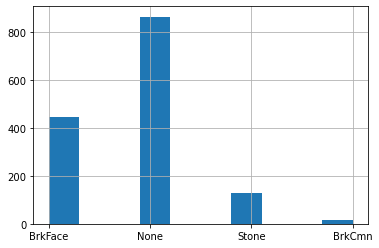

In [17]:
df_train['MasVnrType'].hist()

In [18]:
df_train['MasVnrType'].mode()

0    None
dtype: object

In [19]:
df_train['MasVnrType'].fillna(value=df_train['MasVnrType'].mode()[0],inplace=True)

In [20]:
df_train['MasVnrType'].isna().sum()

0

In [21]:
df_test['MasVnrType'].isna().sum()

16

In [22]:
df_test['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [23]:
df_test['MasVnrType'].fillna(value=df_train['MasVnrType'].mode()[0],inplace=True)

In [24]:
df_test['MasVnrType'].isna().sum()

0

<AxesSubplot:>

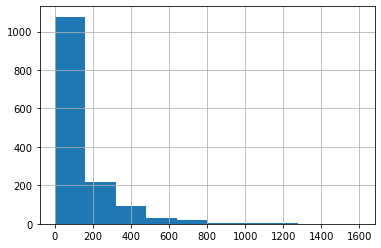

In [25]:
#MasVnrArea=>Masonry veneer area in square feet
df_train['MasVnrArea'].hist()

In [26]:
df_train['MasVnrArea'].mode()

0    0.0
dtype: float64

In [27]:
df_train['MasVnrArea'].mean(),df_train['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [28]:
df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].mode()[0],inplace=True)

In [29]:
df_test['MasVnrArea'].fillna(value=df_train['MasVnrArea'].mode()[0],inplace=True)

In [30]:
#BsmtQual=>  Evaluates the height of the basement=> NA=>No Basement
df_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [31]:
df_train['BsmtQual'].isna().sum()

37

In [32]:
df_train['BsmtQual'].fillna(value='No Basement',inplace=True)

In [33]:
df_test['BsmtQual'].fillna(value='No Basement',inplace=True)

In [34]:
#BsmtCond=>Evaluates the general condition of the basement=>NA=>No Basement
df_train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [35]:
df_train['BsmtCond'].isna().sum()

37

In [36]:
df_train['BsmtCond'].fillna(value='No basement',inplace=True)

In [37]:
df_test['BsmtCond'].fillna(value='No basement',inplace=True)

In [38]:
#BsmtExposure=>NA=>No Basement
df_train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [39]:
df_train['BsmtExposure'].isna().sum()

38

In [40]:
df_train['BsmtExposure'].fillna(value='No basement',inplace=True)

In [41]:
df_test['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [42]:
df_test['BsmtExposure'].fillna(value='No basement',inplace=True)

In [43]:
#BsmtFinType1=>NA=>No Basement
df_train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [44]:
df_train['BsmtFinType1'].fillna(value='No basement',inplace=True)
df_test['BsmtFinType1'].fillna(value='No basement',inplace=True)

In [45]:
#BsmtFinType2=> NA=>No Basement
df_train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [46]:
df_train['BsmtFinType2'].fillna(value='No basement',inplace=True)
df_test['BsmtFinType2'].fillna(value='No basement',inplace=True)

In [47]:
#Electrical
df_train['Electrical'].isna().sum()

1

<AxesSubplot:>

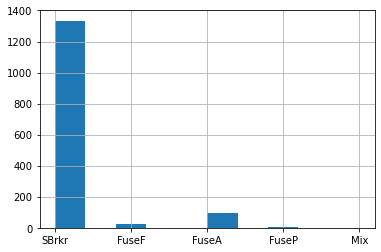

In [48]:
df_train['Electrical'].hist()

In [49]:
df_train['Electrical'].fillna(value=df_train['Electrical'].mode()[0],inplace=True)

In [50]:
df_test['Electrical'].isna().sum()

0

In [51]:
#FireplaceQu =>NA=>No Fireplace
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [52]:
df_train['FireplaceQu'].fillna(value='No Fireplace',inplace=True)

In [53]:
df_test['FireplaceQu'].isna().sum()

730

In [54]:
df_test['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [55]:
df_test['FireplaceQu'].fillna(value='No Fireplace',inplace=True)

In [56]:
#GarageType,GarageFinish,GarageQual,GarageCond=> NA=>No Garage
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [57]:
df_train['GarageType'].fillna(value='No Garage',inplace=True)

In [58]:
df_test['GarageType'].fillna(value='No Garage',inplace=True)

In [59]:
df_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [60]:
df_train['GarageFinish'].fillna(value='No Garage',inplace=True)
df_test['GarageFinish'].fillna(value='No Garage',inplace=True)

In [61]:
df_train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [62]:
df_train['GarageQual'].fillna(value='No Garage',inplace=True)
df_test['GarageQual'].fillna(value='No Garage',inplace=True)

In [63]:
df_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [64]:
df_train['GarageCond'].fillna(value='No Garage',inplace=True)
df_test['GarageCond'].fillna(value='No Garage',inplace=True)

<AxesSubplot:>

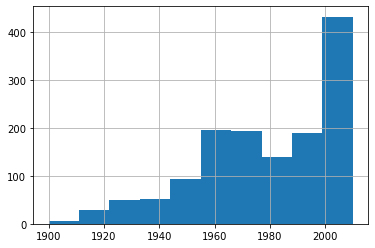

In [65]:
#GarageYrBlt
df_train['GarageYrBlt'].hist()

In [66]:
df_train['GarageYrBlt'].mean(),df_train['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

In [67]:
df_train['GarageYrBlt'].fillna(value=df_train['GarageYrBlt'].median(),inplace=True)
df_test['GarageYrBlt'].fillna(value=df_train['GarageYrBlt'].median(),inplace=True)

<AxesSubplot:>

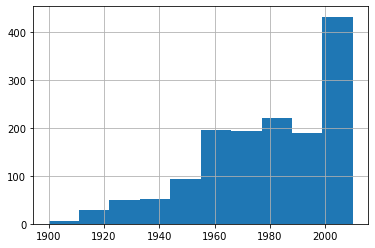

In [68]:
df_train['GarageYrBlt'].hist()

In [69]:
#PoolQC=> NA=>No Pool
df_train['PoolQC'].isna().sum()

1453

In [70]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [71]:
df_train['PoolQC'].fillna(value='No Pool',inplace=True)
df_test['PoolQC'].fillna(value='No Pool',inplace=True)

In [72]:
#Fence=>NA=>No Fence
df_train['Fence'].isna().sum()

1179

In [73]:
df_train['Fence'].fillna(value='No Fence',inplace=True)
df_test['Fence'].fillna(value='No Fence',inplace=True)

In [74]:
df_train['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [75]:
#MiscFeature=> NA=>No MiscFeature
df_train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [76]:
df_train['MiscFeature'].isna().sum()

1406

In [77]:
df_train['MiscFeature'].fillna(value='No MiscFeature',inplace=True)
df_test['MiscFeature'].fillna(value='No MiscFeature',inplace=True)

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [79]:
#Utilities
df_test['Utilities'].isna().sum()

2

In [80]:
df_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [81]:
df_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [82]:
df_test['Utilities'].fillna(value=df_train['Utilities'].mode()[0],inplace=True)

In [83]:
#MSZoning 
df_test['MSZoning'].isna().sum()

4

<AxesSubplot:>

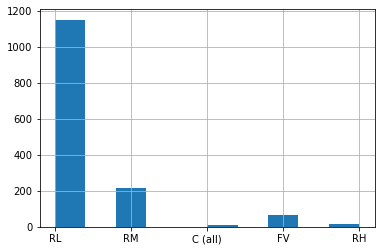

In [84]:
df_train['MSZoning'].hist()

In [85]:
df_test['MSZoning'].fillna(value=df_train['MSZoning'].mode()[0],inplace=True)

In [86]:
#Exterior1st
df_train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [87]:
df_test['Exterior1st'].fillna(value=df_train['Exterior1st'].mode()[0],inplace=True)

In [88]:
#Exterior2nd
df_train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [89]:
df_test['Exterior2nd'].fillna(value=df_train['Exterior2nd'].mode()[0],inplace=True)

<AxesSubplot:>

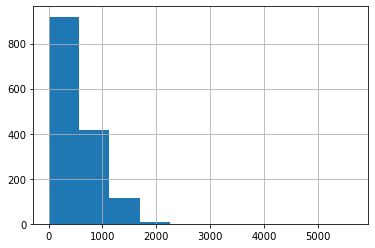

In [90]:
#BsmtFinSF1
df_train['BsmtFinSF1'].hist()

In [91]:
df_test['BsmtFinSF1'].isna().sum()

1

In [92]:
df_train['BsmtFinSF1'].mode()

0    0
dtype: int64

In [93]:
df_train['BsmtFinSF1'].mean()

443.6397260273973

In [94]:
df_test['BsmtFinSF1'].fillna(value=df_train['BsmtFinSF1'].mean(),inplace=True)

In [95]:
#BsmtFinSF2
df_test['BsmtFinSF2'].isna().sum()

1

<AxesSubplot:>

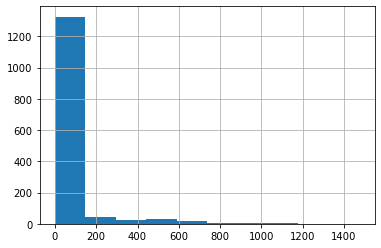

In [96]:
df_train['BsmtFinSF2'].hist()

In [97]:
df_test['BsmtFinSF2'].fillna(value=df_train['BsmtFinSF2'].mode()[0],inplace=True)

In [98]:
#BsmtUnfSF ,TotalBsmtSF 
df_train['BsmtUnfSF'].mean(),df_train['TotalBsmtSF'].median()

(567.2404109589041, 991.5)

<AxesSubplot:>

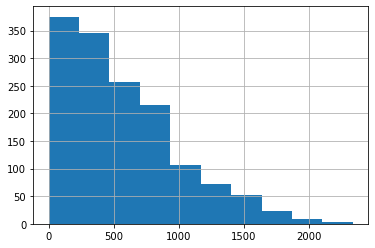

In [99]:
df_train['BsmtUnfSF'].hist()

In [100]:
df_test['BsmtUnfSF'].fillna(value=df_train['BsmtUnfSF'].median(),inplace=True)

<AxesSubplot:>

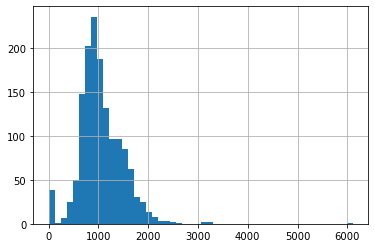

In [101]:
df_train['TotalBsmtSF'].hist(bins=50)

In [102]:
df_test['TotalBsmtSF'].fillna(value=df_train['TotalBsmtSF'].mean(),inplace=True)

<AxesSubplot:>

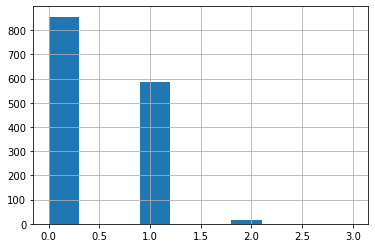

In [103]:
#BsmtFullBath, BsmtHalfBath
df_train['BsmtFullBath'].hist()

In [104]:
df_test['BsmtFullBath'].fillna(value=df_train['BsmtFullBath'].mode()[0],inplace=True)

<AxesSubplot:>

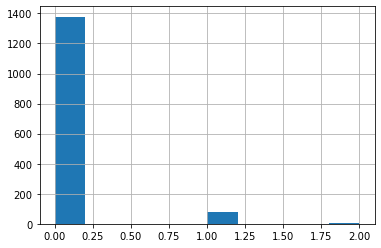

In [105]:
df_train['BsmtHalfBath'].hist()

In [106]:
df_test['BsmtHalfBath'].fillna(value=df_train['BsmtHalfBath'].mode()[0],inplace=True)

<AxesSubplot:>

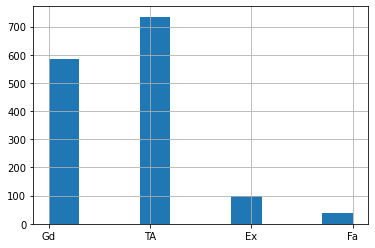

In [107]:
#KitchenQual,Functional
df_train['KitchenQual'].hist()

In [108]:
df_test['KitchenQual'].fillna(value=df_train['KitchenQual'].mode()[0],inplace=True)

<AxesSubplot:>

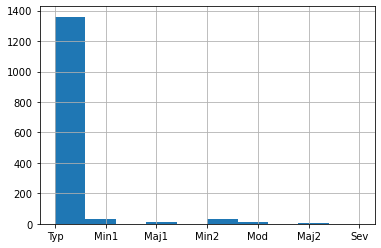

In [109]:
df_train['Functional'].hist()

In [110]:
df_test['Functional'].fillna(value=df_train['Functional'].mode()[0],inplace=True)

<AxesSubplot:>

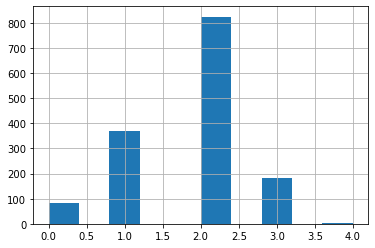

In [111]:
#GarageCars ,GarageArea
df_train['GarageCars'].hist()

In [112]:
df_test['GarageCars'].fillna(value=df_train['GarageCars'].mode()[0],inplace=True)

<AxesSubplot:>

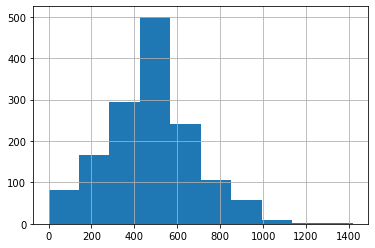

In [113]:
df_train['GarageArea'].hist()

In [114]:
df_train['GarageArea'].median()

480.0

In [115]:
df_test['GarageArea'].fillna(value=df_train['GarageArea'].mean(),inplace=True)

<AxesSubplot:>

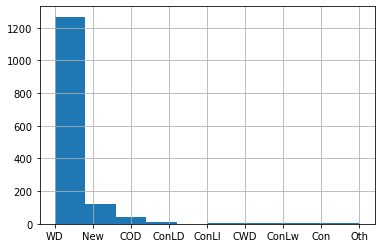

In [116]:
#SaleType
df_train['SaleType'].hist()

In [117]:
df_test['SaleType'].fillna(value=df_train['SaleType'].mode()[0],inplace=True)

# Encoding

In [118]:
c=df_train.columns

In [119]:
categorical=[]
numerical=[]
for i in c:
    t=df_train[i].dtype
    if t=='int64'or t=='float64':
        numerical.append(i)
    if t=='object':
        categorical.append(i)
        

In [120]:
len(numerical),len(categorical),len(numerical)+len(categorical)

(38, 43, 81)

In [121]:
ct=df_test.columns
categorical_t=[]
numerical_t=[]
for j in ct:
    tt=df_test[j].dtype
    if tt=='int64'or tt=='float64':
        numerical_t.append(j)
    if tt=='object':
        categorical_t.append(j)
        

In [122]:
len(numerical_t),len(categorical_t),len(numerical_t)+len(categorical_t)

(37, 43, 80)

In [123]:
critical_cat=[]
for col in categorical:
    if df_train[col].nunique()!=df_test[col].nunique():
        critical_cat.append(col)
        print(col)
    else:
        continue

Utilities
Condition2
HouseStyle
RoofMatl
Exterior1st
Exterior2nd
Heating
Electrical
GarageQual
PoolQC
MiscFeature


In [124]:
cat=[]
for col in categorical:
    if df_train[col].nunique()==df_test[col].nunique():
        cat.append(col)
        print(col)
    else:
        continue

MSZoning
Street
Alley
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
BldgType
RoofStyle
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [125]:
len(critical_cat)

11

In [126]:
df_train=df_train.replace({'PoolQC':{'Ex':4,
       'Gd':3,
       'TA':2,
       'Fa':1,
      'No Pool':0}})


df_test=df_test.replace({'PoolQC':{'Ex':4,
       'Gd':3,
       'TA':2,
       'Fa':1,
      'No Pool':0}})


In [127]:
df_train['PoolQC'].value_counts()

0    1453
3       3
1       2
4       2
Name: PoolQC, dtype: int64

In [128]:
df_test['PoolQC'].value_counts()

0    1456
4       2
3       1
Name: PoolQC, dtype: int64

In [129]:
critical_cat.remove('PoolQC')

In [130]:
len(critical_cat)

10

In [131]:
df_train=df_train.replace({'GarageQual':{'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
      'No Garage':0}})

df_test=df_test.replace({'GarageQual':{'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
      'No Garage':0}})
critical_cat.remove('GarageQual')

In [132]:
df_train=df_train.replace({'Utilities':{'AllPub':4,
       'NoSewr':3,
      'NoSeWa':2,
       'ELO': 1}})

df_test=df_test.replace({'Utilities':{'AllPub':4,
                                      'NoSewr':3,
'NoSeWa':2,
       'ELO':1 }})

critical_cat.remove('Utilities')

In [133]:
critical_cat

['Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'Electrical',
 'MiscFeature']

In [134]:
df_train['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [135]:
df_test['Condition2'].value_counts()

Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64

In [136]:
v_c=critical_cat


In [137]:
temp_train=pd.get_dummies(df_train['Condition2'],drop_first=True,prefix='Condition2')
test_test=pd.get_dummies(df_test['Condition2'],drop_first=True,prefix='Condition2')

In [138]:
df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

In [139]:
df_test['Condition2_RAe']=np.zeros((1459*1))
df_test['Condition2_RRAn ']=np.zeros((1459*1))
df_test['Condition2_RRNn']=np.zeros((1459*1))

In [140]:
v_c

['Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'Electrical',
 'MiscFeature']

In [141]:
df_train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [142]:
df_test['HouseStyle'].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [143]:
temp_train=pd.get_dummies(df_train['HouseStyle'],drop_first=True,prefix='HouseStyle')
test_test=pd.get_dummies(df_test['HouseStyle'],drop_first=True,prefix='HouseStyle')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['HouseStyle_2.5Fin']=np.zeros((1459*1))

In [144]:
df_train['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [145]:
df_test['RoofMatl'].value_counts()

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [146]:
temp_train=pd.get_dummies(df_train['RoofMatl'],drop_first=True,prefix='RoofMatl')
test_test=pd.get_dummies(df_test['RoofMatl'],drop_first=True,prefix='RoofMatl')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['RoofMatl_Metal']=np.zeros((1459*1))
df_test['RoofMatl_Roll']=np.zeros((1459*1))
df_test['RoofMatl_ClyTile']=np.zeros((1459*1))
df_test['RoofMatl_Membran']=np.zeros((1459*1))

In [147]:
df_train['Exterior1st'].value_counts(),df_train['Exterior1st'].nunique()

(VinylSd    515
 HdBoard    222
 MetalSd    220
 Wd Sdng    206
 Plywood    108
 CemntBd     61
 BrkFace     50
 WdShing     26
 Stucco      25
 AsbShng     20
 BrkComm      2
 Stone        2
 ImStucc      1
 AsphShn      1
 CBlock       1
 Name: Exterior1st, dtype: int64,
 15)

In [148]:
df_test['Exterior1st'].value_counts(),df_test['Exterior1st'].nunique()

(VinylSd    511
 MetalSd    230
 HdBoard    220
 Wd Sdng    205
 Plywood    113
 CemntBd     65
 BrkFace     37
 WdShing     30
 AsbShng     24
 Stucco      18
 BrkComm      4
 AsphShn      1
 CBlock       1
 Name: Exterior1st, dtype: int64,
 13)

In [149]:
temp_train=pd.get_dummies(df_train['Exterior1st'],drop_first=True,prefix='Exterior1st')
test_test=pd.get_dummies(df_test['Exterior1st'],drop_first=True,prefix='Exterior1st')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['Exterior1st_Stone']=np.zeros((1459*1))
df_test['Exterior1st_ImStucc']=np.zeros((1459*1))

In [150]:
df_train['Exterior2nd'].value_counts(),df_train['Exterior2nd'].nunique()


(VinylSd    504
 MetalSd    214
 HdBoard    207
 Wd Sdng    197
 Plywood    142
 CmentBd     60
 Wd Shng     38
 Stucco      26
 BrkFace     25
 AsbShng     20
 ImStucc     10
 Brk Cmn      7
 Stone        5
 AsphShn      3
 Other        1
 CBlock       1
 Name: Exterior2nd, dtype: int64,
 16)

In [151]:
df_test['Exterior2nd'].value_counts(),df_test['Exterior2nd'].nunique()

(VinylSd    511
 MetalSd    233
 HdBoard    199
 Wd Sdng    194
 Plywood    128
 CmentBd     66
 Wd Shng     43
 BrkFace     22
 Stucco      21
 AsbShng     18
 Brk Cmn     15
 ImStucc      5
 CBlock       2
 Stone        1
 AsphShn      1
 Name: Exterior2nd, dtype: int64,
 15)

In [152]:
temp_train=pd.get_dummies(df_train['Exterior2nd'],drop_first=True,prefix='Exterior2nd')
test_test=pd.get_dummies(df_test['Exterior2nd'],drop_first=True,prefix='Exterior2nd')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['Exterior2nd_Other']=np.zeros((1459*1))

In [153]:
df_train['Heating'].value_counts(),df_train['Heating'].nunique()

(GasA     1428
 GasW       18
 Grav        7
 Wall        4
 OthW        2
 Floor       1
 Name: Heating, dtype: int64,
 6)

In [154]:
df_test['Heating'].value_counts(),df_test['Heating'].nunique()

(GasA    1446
 GasW       9
 Wall       2
 Grav       2
 Name: Heating, dtype: int64,
 4)

In [155]:
temp_train=pd.get_dummies(df_train['Heating'],drop_first=True,prefix='Heating')
test_test=pd.get_dummies(df_test['Heating'],drop_first=True,prefix='Heating')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['Heating_ Floor']=np.zeros((1459*1))
df_test['Heating_OthW']=np.zeros((1459*1))

In [156]:
df_train['Electrical'].value_counts(),df_train['Electrical'].nunique()

(SBrkr    1335
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64,
 5)

In [157]:
df_test['Electrical'].value_counts(),df_test['Electrical'].nunique()

(SBrkr    1337
 FuseA      94
 FuseF      23
 FuseP       5
 Name: Electrical, dtype: int64,
 4)

In [158]:
temp_train=pd.get_dummies(df_train['Electrical'],drop_first=True,prefix='Electrical')
test_test=pd.get_dummies(df_test['Electrical'],drop_first=True,prefix='Electrical')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['Electrical_ Mix']=np.zeros((1459*1))

In [159]:
df_train['MiscFeature'].value_counts(),df_train['MiscFeature'].nunique()

(No MiscFeature    1406
 Shed                49
 Gar2                 2
 Othr                 2
 TenC                 1
 Name: MiscFeature, dtype: int64,
 5)

In [160]:
df_test['MiscFeature'].value_counts(),df_test['MiscFeature'].nunique()

(No MiscFeature    1408
 Shed                46
 Gar2                 3
 Othr                 2
 Name: MiscFeature, dtype: int64,
 4)

In [161]:
temp_train=pd.get_dummies(df_train['MiscFeature'],drop_first=True,prefix='MiscFeature')
test_test=pd.get_dummies(df_test['MiscFeature'],drop_first=True,prefix='MiscFeature')

df_train=pd.concat([temp_train,df_train],axis=1)
df_test=pd.concat([test_test,df_test],axis=1)

df_test['MiscFeature_TenC']=np.zeros((1459*1))

In [162]:
for i in v_c:
    df_train.drop(i,axis=1,inplace=True)
    df_test.drop(i,axis=1,inplace=True)

In [163]:
for col in cat:
    temp=pd.get_dummies(df_train[col],prefix=col,drop_first=True)
    df_train=pd.concat([temp,df_train],axis=1)
    df_train.drop(col,axis=1,inplace=True)
    

In [164]:
for col in cat:
    temp=pd.get_dummies(df_test[col],prefix=col,drop_first=True)
    df_test=pd.concat([temp,df_test],axis=1)
    df_test.drop(col,axis=1,inplace=True)

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 255 entries, SaleCondition_AdjLand to SalePrice
dtypes: float64(3), int64(38), uint8(214)
memory usage: 772.9 KB


In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 254 entries, SaleCondition_AdjLand to MiscFeature_TenC
dtypes: float64(26), int64(29), uint8(199)
memory usage: 910.6 KB


# saving cleaned data


In [167]:
df_train.to_csv('train_clean_houseprice')

In [168]:
df_test.to_csv('test_clean_houseprice')

# model training

In [169]:
X = df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

In [170]:
X.shape, y.shape

((1460, 254), (1460,))

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

In [173]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1168, 254), (1168,), (292, 254), (292,))

In [174]:
from xgboost import XGBRegressor

In [175]:
model=XGBRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

[20:10:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8875857099019592

In [176]:
from sklearn.metrics import mean_squared_log_error

In [177]:
mean_squared_log_error(y_test,model.predict(X_test))

0.01890812312576701